![board game](board_game.jpg)

# Which board game should you play?

## 📖 Background

After a tiring week, what better way to unwind than a board game night with friends and family? But the question remains: which game should you pick? You have gathered a dataset containing information of over `20,000` board games. It's time to utilize your analytical skills and use data-driven insights to persuade your group to try the game you've chosen!

## 💾 The Data

You've come across a dataset titled `bgg_data.csv` containing details on over `20,000` ranked board games from the BoardGameGeek (BGG) website. BGG is the premier online hub for board game enthusiasts, hosting data on more than `100,000` games, inclusive of both ranked and unranked varieties. This platform thrives due to its active community, who contribute by posting reviews, ratings, images, videos, session reports, and participating in live discussions.

This specific dataset, assembled in `February 2021`, encompasses all ranked games listed on BGG up to that date. Games without a ranking were left out because they didn't garner enough reviews; for a game to earn a rank, it needs a minimum of `30` votes.

In this dataset, each row denotes a board game and is associated with some information.

| Column     | Description              |
|------------|--------------------------|
| `ID` | The ID of the board game. |
| `Name` | The name of the board game.|
| `Year Published` | The year when the game was published.|
| `Min Players` | The minimum number of player recommended for the game.|
| `Max Players` | The maximum number of player recommended for the game.|
| `Play Time` | The average play time suggested by game creators, measured in minutes.|
| `Min Age` | The recommended minimum age of players.|
| `Users Rated` | The number of users who rated the game.|
| `Rating Average` | The average rating of the game, on a scale of 1 to 10.|
| `BGG Rank` | The rank of the game on the BoardGameGeek (BGG) website.| 
| `Complexity Average` | The average complexity value of the game, on a scale of 1 to 5.|
| `Owned Users` |  The number of BGG registered owners of the game.| 
| `Mechanics` | The mechanics used by the game.| 
| `Domains` | The board game domains that the game belongs to.|

**Source:** Dilini Samarasinghe, July 5, 2021, "BoardGameGeek Dataset on Board Games", IEEE Dataport, doi: https://dx.doi.org/10.21227/9g61-bs59.

In [34]:
import pandas as pd
boardgame = pd.read_csv('data/bgg_data.csv')
boardgame

ID  ...                           Domains
0      174430.0  ...    Strategy Games, Thematic Games
1      161936.0  ...    Strategy Games, Thematic Games
2      224517.0  ...                    Strategy Games
3      167791.0  ...                    Strategy Games
4      233078.0  ...    Strategy Games, Thematic Games
...         ...  ...                               ...
20338   16398.0  ...                  Children's Games
20339    7316.0  ...                       Party Games
20340    5048.0  ...                  Children's Games
20341    5432.0  ...                  Children's Games
20342   11901.0  ...  Abstract Games, Children's Games

[20343 rows x 14 columns]

## 💪 Challenge
Explore and analyze the board game data, and share the intriguing insights with your friends through a report. Here are some steps that might help you get started:

* Is this dataset ready for analysis? Some variables have inappropriate data types, and there are outliers and missing values. Apply data cleaning techniques to preprocess the dataset.
* Use data visualization techniques to draw further insights from the dataset. 
* Find out if the number of players impacts the game's average rating.

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

Let's first explore the dataset, so we have a better understanding of what we will be dealing with. Then we can continue with cleaning it.

In [35]:
boardgame[boardgame.duplicated()]

Empty DataFrame
Columns: [ID, Name, Year Published, Min Players, Max Players, Play Time, Min Age, Users Rated, Rating Average, BGG Rank, Complexity Average, Owned Users, Mechanics, Domains]
Index: []

In [36]:
boardgame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB


In [37]:
#boardgame['Owned Users'] = boardgame['Owned Users'].astype(int)

In [38]:
boardgame.isna().sum()

ID                       16
Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64

In [39]:
boardgame['Owned Users'] = boardgame['Owned Users'].fillna(309)
boardgame.isna().sum()

ID                       16
Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users               0
Mechanics              1598
Domains               10159
dtype: int64

In [40]:
boardgame['Owned Users'] = boardgame['Owned Users'].astype(int)
boardgame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20343 non-null  int64  
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(4), int64(7), object(3)
memory usage: 2.2+ MB


In [41]:
print(len(boardgame[boardgame['Year Published']<0]), f'games invented BC')
boardgame.describe()

10 games invented BC


ID  Year Published  ...  Complexity Average    Owned Users
count   20327.000000    20342.000000  ...        20343.000000   20343.000000
mean   108216.245142     1984.249877  ...            1.641283    1407.214570
std     98682.097298      214.003181  ...            1.138844    5037.464639
min         1.000000    -3500.000000  ...            0.000000       0.000000
25%     11029.000000     2001.000000  ...            1.080000     146.000000
50%     88931.000000     2011.000000  ...            1.670000     309.000000
75%    192939.500000     2016.000000  ...            2.475000     864.000000
max    331787.000000     2022.000000  ...            4.930000  155312.000000

[8 rows x 11 columns]

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
boardgame.sort_values('Rating Average',ascending=False)

ID  ...           Domains
14596  275777.0  ...               NaN
11687  322354.0  ...               NaN
10246  275972.0  ...               NaN
16310  228370.0  ...               NaN
13547  281257.0  ...               NaN
...         ...  ...               ...
18522    9541.0  ...  Children's Games
18490   17071.0  ...               NaN
18228    5084.0  ...    Abstract Games
19755    5254.0  ...               NaN
19927  240142.0  ...               NaN

[20343 rows x 14 columns]

In [43]:
boardgame.sort_values('BGG Rank')

ID  ...                           Domains
0      174430.0  ...    Strategy Games, Thematic Games
1      161936.0  ...    Strategy Games, Thematic Games
2      224517.0  ...                    Strategy Games
3      167791.0  ...                    Strategy Games
4      233078.0  ...    Strategy Games, Thematic Games
...         ...  ...                               ...
20338   16398.0  ...                  Children's Games
20339    7316.0  ...                       Party Games
20340    5048.0  ...                  Children's Games
20341    5432.0  ...                  Children's Games
20342   11901.0  ...  Abstract Games, Children's Games

[20343 rows x 14 columns]

We could, for instance, compare the top ranked game from the scale of 1 to 10 and the top ranked game from BGG. 

In [44]:
boardgame[(boardgame['Name']=='Erune') | (boardgame['Name']=='Gloomhaven')] 

ID  ...                         Domains
0      174430.0  ...  Strategy Games, Thematic Games
14596  275777.0  ...                             NaN

[2 rows x 14 columns]

<AxesSubplot: xlabel='Min Players', ylabel='Rating Average'>

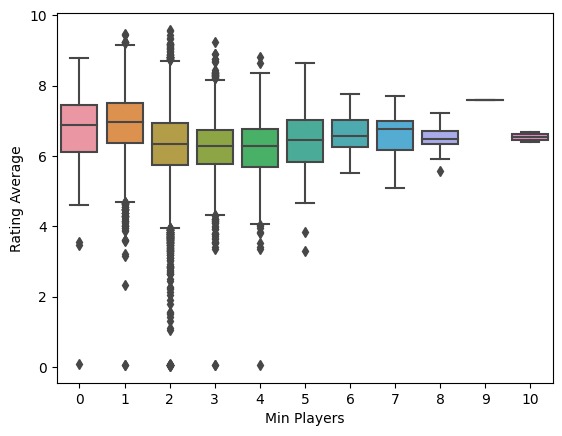

In [45]:
sns.boxplot(x='Min Players',y='Rating Average',data=boardgame)

From the describe method, we saw that the median BGG rank was 10173, and the mean of ratings was around 6.5. We could try to filter all the games which surpass these ratings. Let's call these games top_games

In [46]:
top_games = boardgame[(boardgame['BGG Rank'] <= 10173) & (boardgame['Rating Average'] >= 6.5)]
top_games

ID  ...                         Domains
0      174430.0  ...  Strategy Games, Thematic Games
1      161936.0  ...  Strategy Games, Thematic Games
2      224517.0  ...                  Strategy Games
3      167791.0  ...                  Strategy Games
4      233078.0  ...  Strategy Games, Thematic Games
...         ...  ...                             ...
10165  251832.0  ...                             NaN
10166  252277.0  ...                             NaN
10167   26132.0  ...                             NaN
10170    8736.0  ...                        Wargames
10171   91438.0  ...                        Wargames

[7507 rows x 14 columns]

You might think we gained nothing, but we actually decreased our pool of games from 20000 to 7500. The thing is, we cannot find a universal game which will be liked by everyone. We have to find a game which satisfies most of the preferences of the players. If we are playing with kids, we should probably filter all games which are in the kids' domain.

In [47]:
top_games[top_games['Domains']=="Children's Games"]

ID  ...           Domains
915     17329.0  ...  Children's Games
928       327.0  ...  Children's Games
1053   172931.0  ...  Children's Games
1315     6351.0  ...  Children's Games
1485    41010.0  ...  Children's Games
1793     3570.0  ...  Children's Games
1910   191004.0  ...  Children's Games
2106     8195.0  ...  Children's Games
2107     4209.0  ...  Children's Games
2232   218208.0  ...  Children's Games
2595   130792.0  ...  Children's Games
2617    41302.0  ...  Children's Games
2686   191538.0  ...  Children's Games
2732    33643.0  ...  Children's Games
2786   235655.0  ...  Children's Games
3137   247314.0  ...  Children's Games
3483    84464.0  ...  Children's Games
3653   269526.0  ...  Children's Games
3656    23890.0  ...  Children's Games
3705     2129.0  ...  Children's Games
4182    30328.0  ...  Children's Games
4224    64220.0  ...  Children's Games
4319    92644.0  ...  Children's Games
4531   242740.0  ...  Children's Games
4545   244320.0  ...  Children's Games
4760     4637.0  ...  Children's Games
4779   267314.0  ...  Children's Games
4789   175088.0  ...  Children's Games
4983     4522.0  ...  Children's Games
5033   300010.0  ...  Children's Games
5635    29017.0  ...  Children's Games
5925     7483.0  ...  Children's Games
6025   119464.0  ...  Children's Games
6169   137480.0  ...  Children's Games
6406    63778.0  ...  Children's Games
6555    35865.0  ...  Children's Games
6565    26118.0  ...  Children's Games
6580    67823.0  ...  Children's Games
6762   259830.0  ...  Children's Games
6882   129492.0  ...  Children's Games
7151   198671.0  ...  Children's Games
7233    60245.0  ...  Children's Games
7486   111379.0  ...  Children's Games
7511    84088.0  ...  Children's Games
7709   157451.0  ...  Children's Games
8392   264295.0  ...  Children's Games
8499     6548.0  ...  Children's Games
8645    23657.0  ...  Children's Games
9186     3517.0  ...  Children's Games
9586      665.0  ...  Children's Games
9734    25760.0  ...  Children's Games
9855    38437.0  ...  Children's Games
10049   24209.0  ...  Children's Games

[53 rows x 14 columns]

What we have gathered from this exploration is that every scenario yields a different game. Therefore, we are going to make up a specific scenario and apply our insights to find the best game according to that scenario. 

SCENARIO 1)
Suppose we are a group of 5 adults, and we want to play a game with a maximum complexity average of 2, since we do not want to waste time learning the game. Let's first visualize this set of games. Note tha from now on, we will use top_games rather than the whole dataset since it's much smaller and contains the higher rated games from both user and website rankings.

In [48]:
scenario1 = top_games[(top_games['Min Players'] == 5) & (top_games['Complexity Average']<2)]
scenario1

ID  ...                      Domains
130   128882.0  ...                  Party Games
185   188834.0  ...                  Party Games
271    41114.0  ...                  Party Games
655   135779.0  ...                  Party Games
973    38159.0  ...                  Party Games
1620  152242.0  ...                  Party Games
2539  256877.0  ...                  Party Games
3193  137290.0  ...                  Party Games
3611  230059.0  ...                  Party Games
4871  152241.0  ...                  Party Games
5047  275530.0  ...                          NaN
5636  286428.0  ...                          NaN
5708   67148.0  ...                          NaN
8289   99696.0  ...                          NaN
8590   25768.0  ...  Party Games, Thematic Games

[15 rows x 14 columns]

We have 15 games here. Let's further assume that we want to play once rather than many times, so we filter out the games which last less than 1 hour. The refined set of games looks like this:

In [49]:
scenario1[scenario1['Play Time']>=60]

ID  ...                      Domains
973    38159.0  ...                  Party Games
2539  256877.0  ...                  Party Games
4871  152241.0  ...                  Party Games
8590   25768.0  ...  Party Games, Thematic Games

[4 rows x 14 columns]

Out of these four remaining games, let's pick Ultimate Werewolf as our game of choice, and explore it further in order to understand whether we have made a reasonable choice or not. We notice right away that from the list above, our chosen game has the highest user rating and BGG ranking. Furthermore, average play time amounts to 90 minutes, which is acceptable. The complexity average is 1.5, which means that the game is not too difficult to learn. The number of owned users is greatest in Ultimate Werewolf, so this means it's also the most popular out of the games in the final shortlist.

It is always good practice to visualize trends. To do so, we ask questions like:
What is the relationship between play time and user rating? This question is useful if we for instance hypothesize that a longer play time will decrease ratings of the game. We can visualize this easily below.

<AxesSubplot: xlabel='Play Time', ylabel='Rating Average'>

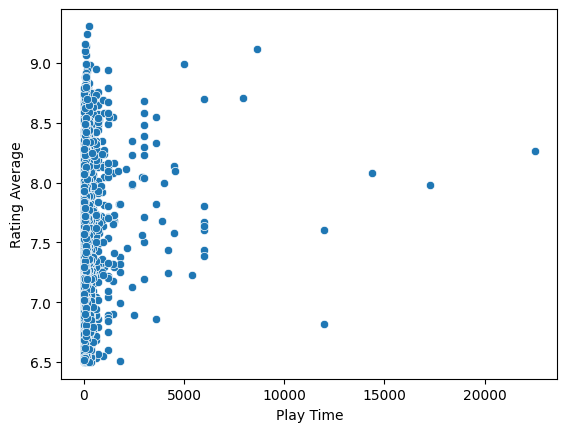

In [50]:
sns.scatterplot(x='Play Time',y='Rating Average',data=top_games)

In [51]:
top_games=top_games[top_games['Play Time']<=300]
top_games

ID  ...                         Domains
0      174430.0  ...  Strategy Games, Thematic Games
1      161936.0  ...  Strategy Games, Thematic Games
2      224517.0  ...                  Strategy Games
3      167791.0  ...                  Strategy Games
5      291457.0  ...  Strategy Games, Thematic Games
...         ...  ...                             ...
10165  251832.0  ...                             NaN
10166  252277.0  ...                             NaN
10167   26132.0  ...                             NaN
10170    8736.0  ...                        Wargames
10171   91438.0  ...                        Wargames

[7058 rows x 14 columns]

<AxesSubplot: xlabel='Play Time', ylabel='Rating Average'>

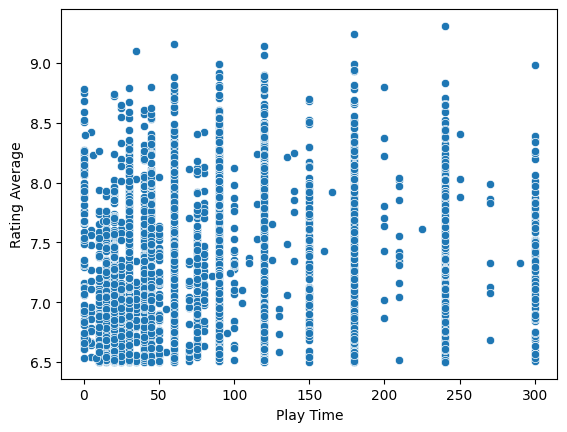

In [52]:
sns.scatterplot(x='Play Time',y='Rating Average',data=top_games)

<AxesSubplot: >

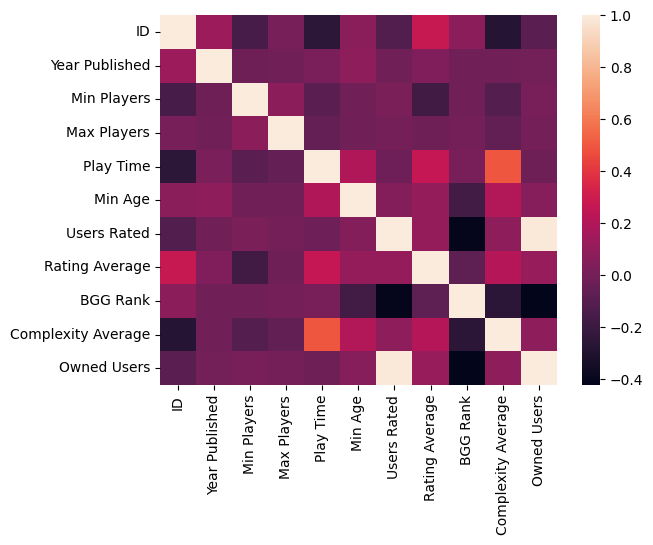

In [53]:
sns.heatmap(top_games.corr())

<AxesSubplot: xlabel='Users Rated', ylabel='Owned Users'>

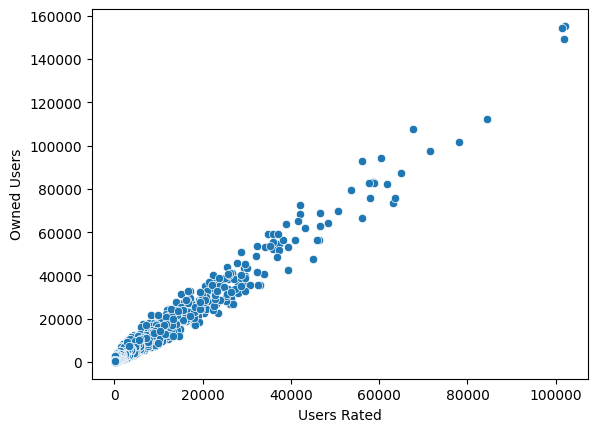

In [54]:
sns.scatterplot(x='Users Rated',y='Owned Users',data=top_games)

Going back to our game, Ultimate Werewolf: Ultimate Edition, if we for example did not know the value for owned users but knew the value for users rated, we could make an educated guess about it.

In conclusion, the game we choose depends on many things, like the number of players, the minimum age. Also, people might be tempted to play a game which is easy to learn, doesn't last too long, is rated highly by others etc. 